<a href="https://colab.research.google.com/github/cgyumun-hash/cgm/blob/main/moon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
from torch import nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [3]:
class FeedforwardneuralNetModel(nn.Module):
  def __init__(self, input_dim, hidden_dim, output_dim):
    super(FeedforwardneuralNetModel, self).__init__()
    #Linear function
    self.fc1 = nn.Linear(input_dim, hidden_dim)
    #Non-linear
    self.sigmoid = nn.Sigmoid()
    #output Linear function
    self.fc2 = nn.Linear(hidden_dim, output_dim)

  def forward(self, x):
    # Linear function # LINEAR
    out = self.fc1(x)
    # Non-linearity # NON-LINEAR
    out = self.sigmoid(out)
    # Linear function (readout) #LINEAR
    out = self.fc2(out)
    return out


Epoch [500/5000], Loss: 0.0015
Final - epoch 499, loss 0.0015321405371651053
Epoch [1000/5000], Loss: 0.0000
Final - epoch 999, loss 1.7684926206129603e-05
Epoch [1500/5000], Loss: 0.0000
Final - epoch 1499, loss 1.642942697799299e-05
Epoch [2000/5000], Loss: 0.0000
Final - epoch 1999, loss 1.561708268127404e-05
Epoch [2500/5000], Loss: 0.0000
Final - epoch 2499, loss 1.4851872037979774e-05
Epoch [3000/5000], Loss: 0.0000
Final - epoch 2999, loss 1.414486177964136e-05
Epoch [3500/5000], Loss: 0.0000
Final - epoch 3499, loss 1.3394974303082563e-05
Epoch [4000/5000], Loss: 0.0000
Final - epoch 3999, loss 1.27029179566307e-05
Epoch [4500/5000], Loss: 0.0000
Final - epoch 4499, loss 1.2201498066133354e-05
Epoch [5000/5000], Loss: 0.0004
Final - epoch 4999, loss 0.00035063549876213074


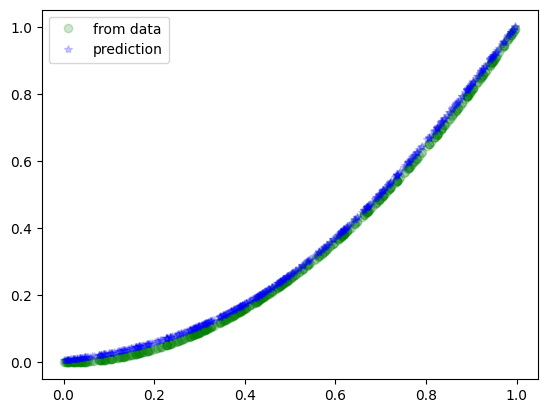

In [4]:
# generate the input data
x_vals = np.random.rand(500)
x_train = np.asarray(x_vals, dtype=np.float32).reshape(-1,1)
y_correct = np.asarray([i**2 for i in x_vals],dtype=np.float32).reshape(-1,1)
# instantiate network
input_dim =1
output_dim =1
hidden_dim = 20

modelFF = FeedforwardneuralNetModel(input_dim, hidden_dim, output_dim)
criterionFF = nn.MSELoss() # Mean Squared Loss
l_rate = 0.01

optimiser = torch.optim.Adam(modelFF.parameters(), lr = l_rate)

epochs = 5000

#Training
for epoch in range(epochs):
  epoch +=1
  #increase the number of epochs by 1 every time
  inputs = Variable(torch.from_numpy(x_train))
  labels = Variable(torch.from_numpy(y_correct))
  #clear grads
  optimiser.zero_grad()
  #forward to get predicted values
  outputs = modelFF.forward(inputs)
  loss = criterionFF(outputs, labels)
  loss.backward() # back props
  optimiser.step() # update the parameters

  if (epoch+1) % 500 == 0: # Logging
    print('Epoch [%d/%d], Loss: %.4f' %(epoch+1, epochs, loss.item()))
    print('Final - epoch {}, loss {}'.format(epoch, loss.item()))

#Test training
predicted = modelFF.forward(Variable(torch.from_numpy(x_train))).data.numpy()
plt.plot(x_train, y_correct, 'go', label = 'from data', alpha = 0.2)
plt.plot(x_train, predicted, 'b*', label = 'prediction', alpha = 0.2)
plt.legend()
plt.show()
